In [1]:
#https://www.kaggle.com/adikeshri/visualizing-africa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data=pd.read_csv("african_crises.csv")
data.sample(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
564,38,MUS,Mauritius,2006,0,34.336800,0,0,0.0,8.930000,1,0,0,no_crisis
748,56,ZAF,South Africa,1940,0,0.251250,0,0,0.0,3.926123,1,1,0,no_crisis
389,19,EGY,Egypt,1966,0,0.434800,0,0,0.0,6.693697,1,0,0,no_crisis
562,38,MUS,Mauritius,2004,0,28.204400,0,0,0.0,4.703000,1,0,0,no_crisis
184,10,CAF,Central African Republic,1979,1,200.999858,0,0,0.0,9.210526,1,0,0,crisis


In [25]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [29]:
data_sysCri=data[data.systemic_crisis==1]
data_sysCri[data_sysCri.banking_crisis=='crisis'].sample(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
256,15,CIV,Ivory Coast,1988,1,3.100000e+02,0,1,0.0,6.935000,1,0,0,crisis
1052,70,ZWE,Zimbabwe,2007,1,1.900000e-16,1,1,0.0,66279.892370,1,1,1,crisis
705,45,NGA,Nigeria,2012,1,1.552700e+02,0,0,0.0,12.225000,1,0,0,crisis
952,69,ZMB,Zambia,1998,1,2.425000e+00,0,0,0.0,24.456000,1,1,1,crisis
1049,70,ZWE,Zimbabwe,2004,1,5.600000e-23,1,1,0.0,132.746774,1,1,1,crisis


In [3]:
countries=data.country.unique()
countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

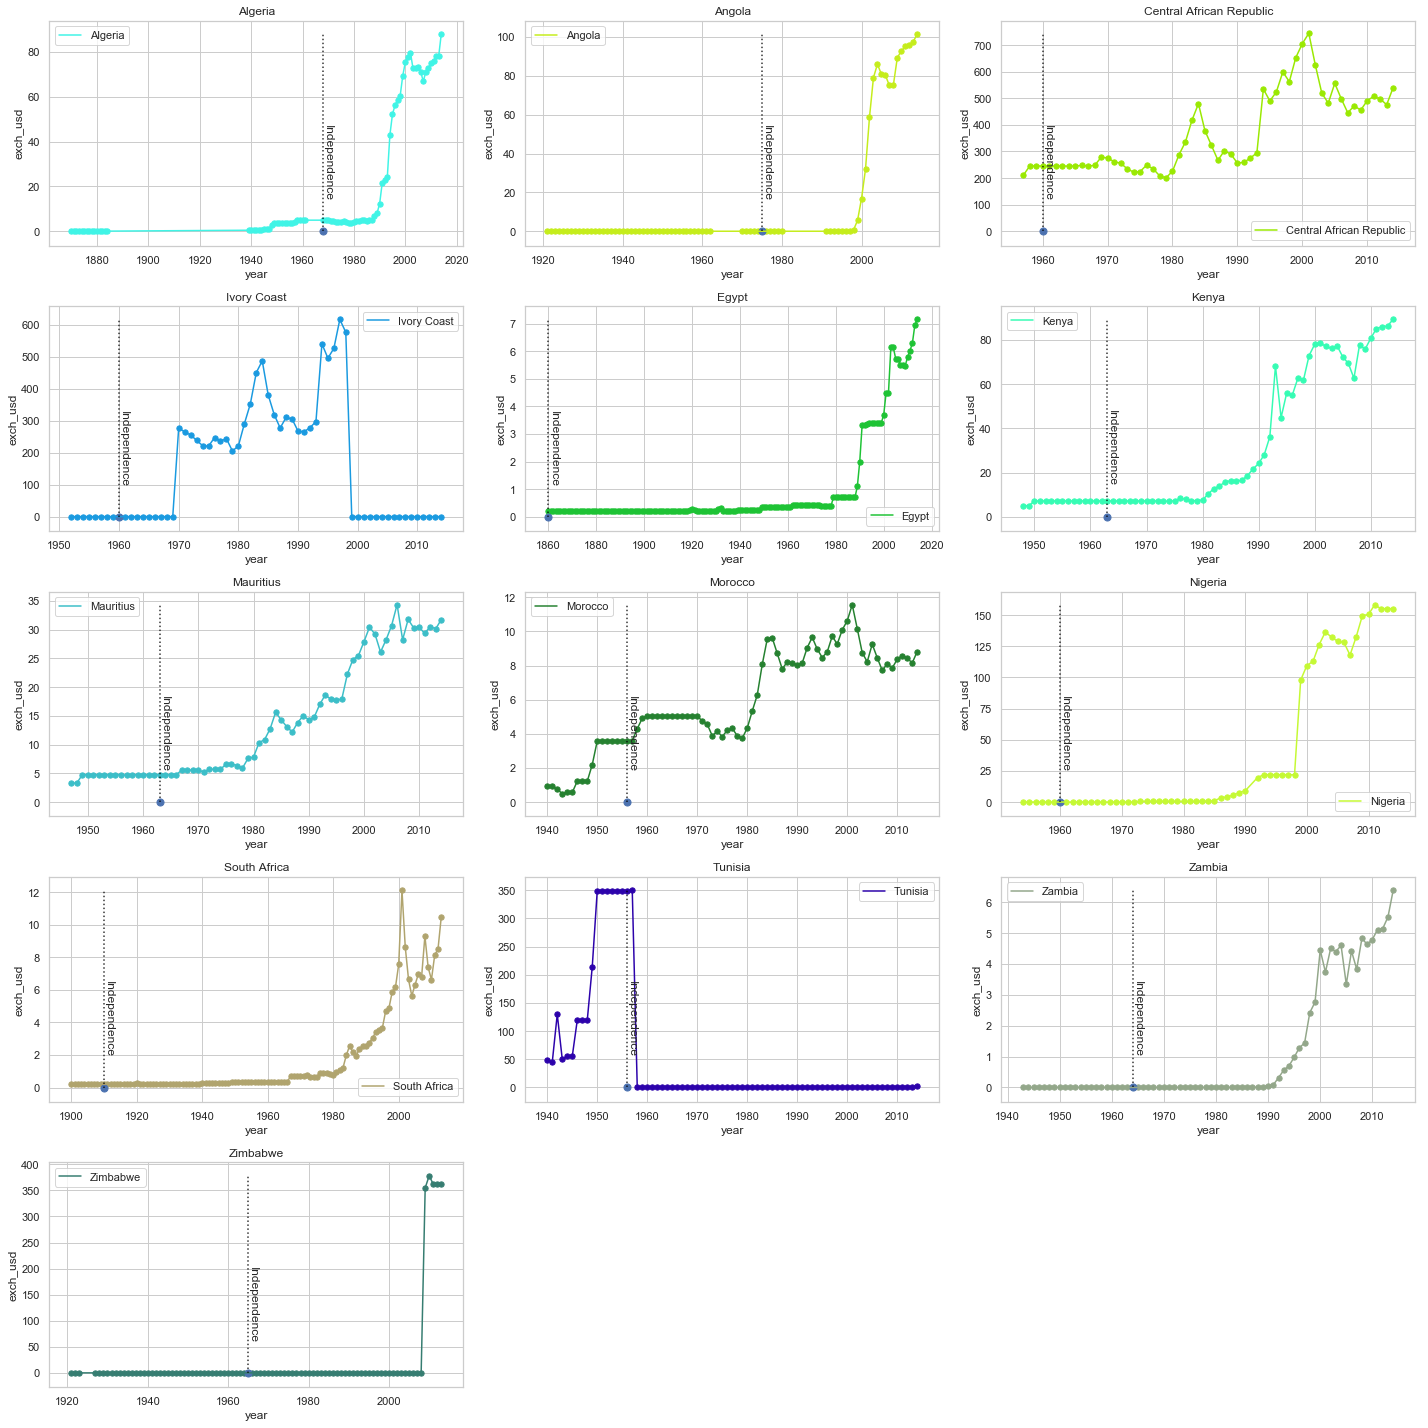

In [37]:
#independence와 exch_usd의 관계
sns.set(style='whitegrid') #아래 sell에서 darkgrid와 비교
plt.figure(figsize=(20,20))
count=1
for country in countries:
    #plt.subplot(x,y,i) ex)plt.subplot(221) 2x2 중 1번째
    plt.subplot(5,3,count)
    count+=1
    #그래프의 색 임의로 생성 ex)#FF120A
    color="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    #year과 exch_usd에 대한 선그래프 생성
    sns.lineplot(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                label=country,color=color)
    #선그래프의 근본이 되는 데이터 점찍기
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                color=color, s=28)
    #plt.plot(index,cloumn)
    #index->min(independence가 1인 해), column-> 0 ~ max(exch_usd)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
            np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
            [0,np.max(data[data.country==country]['exch_usd'])],
             color='black',linestyle='dotted',alpha=0.8)
    #plt.text(x,y,text)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
            np.max(data[data.country==country]['exch_usd'])/2,'Independence',rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=0,s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 115.9+ KB


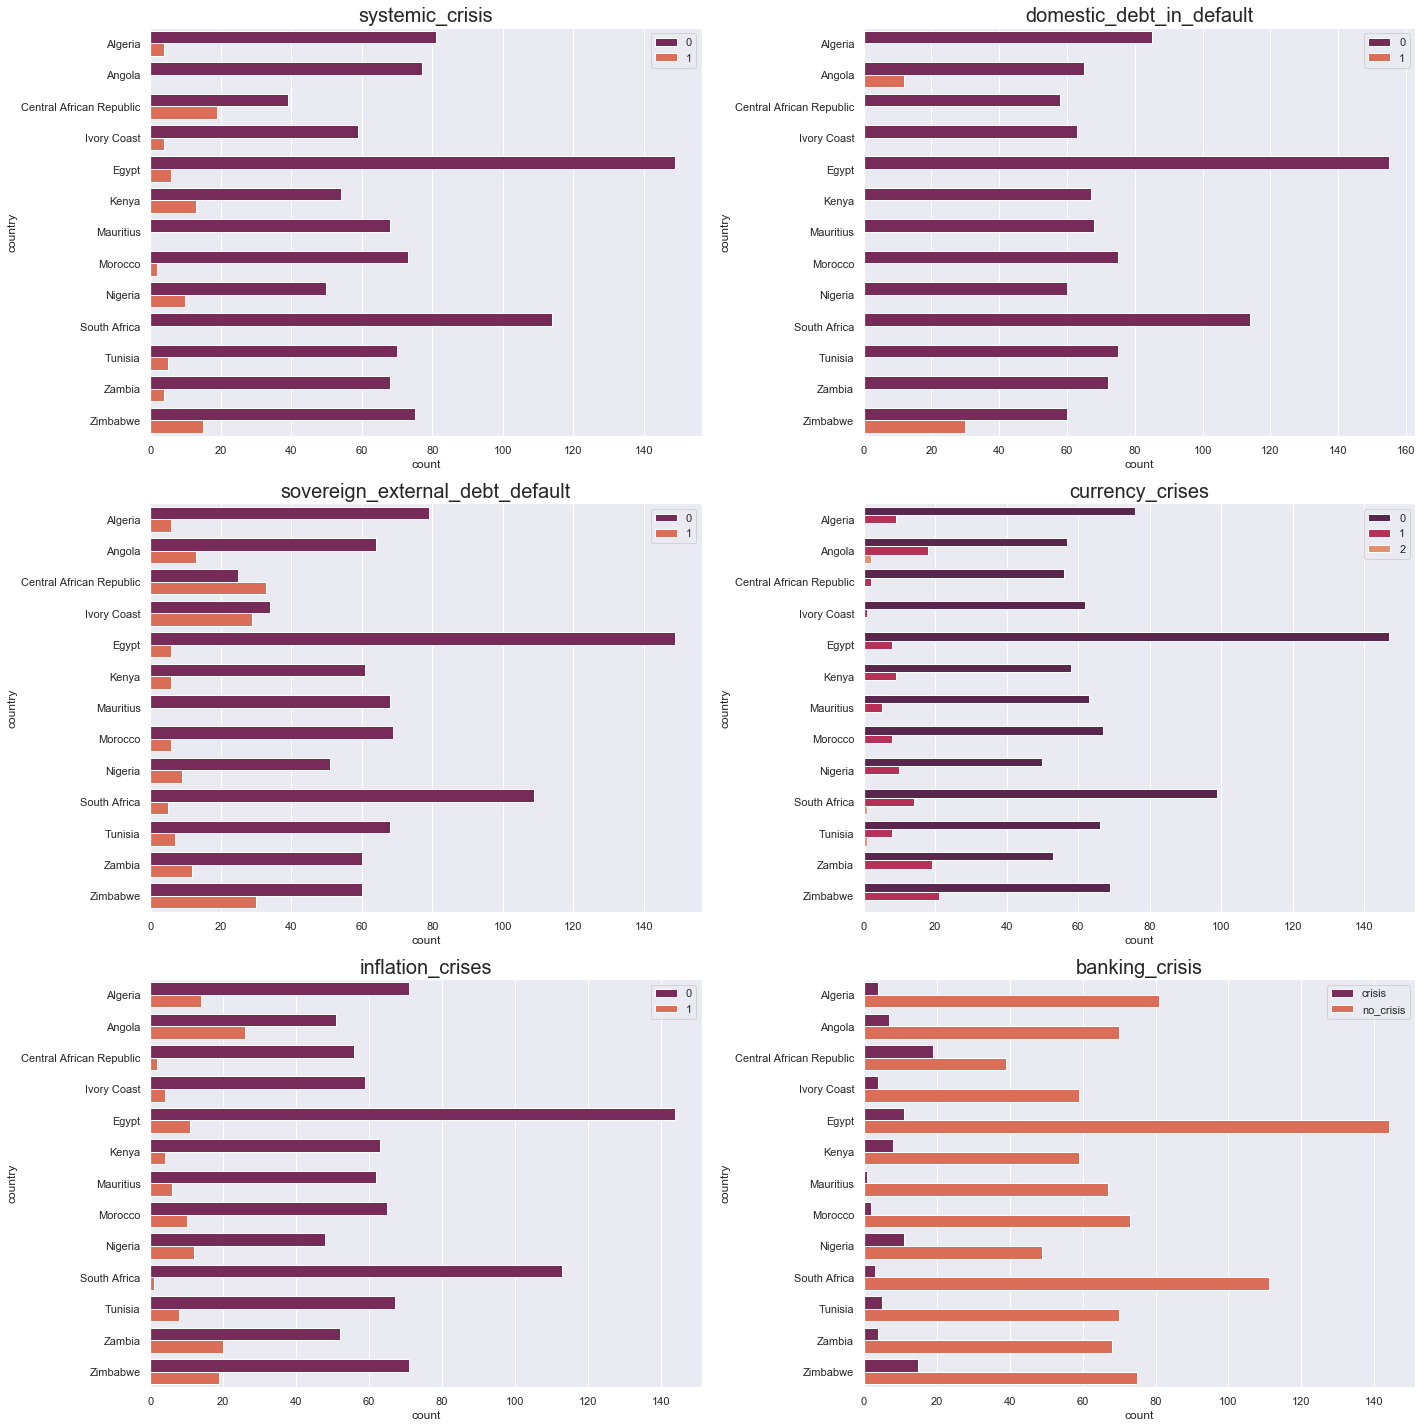

In [66]:
#각 crisis별 국가마다 횟수
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default',
     'currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    #countplot-> 특정 행에 있는 요소마다 횟수 계산 ex) country열에서 각 국가마다 특정 횟수
    sns.countplot(y=data.country,hue=data[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col,size=20)
    plt.tight_layout()
plt.show()

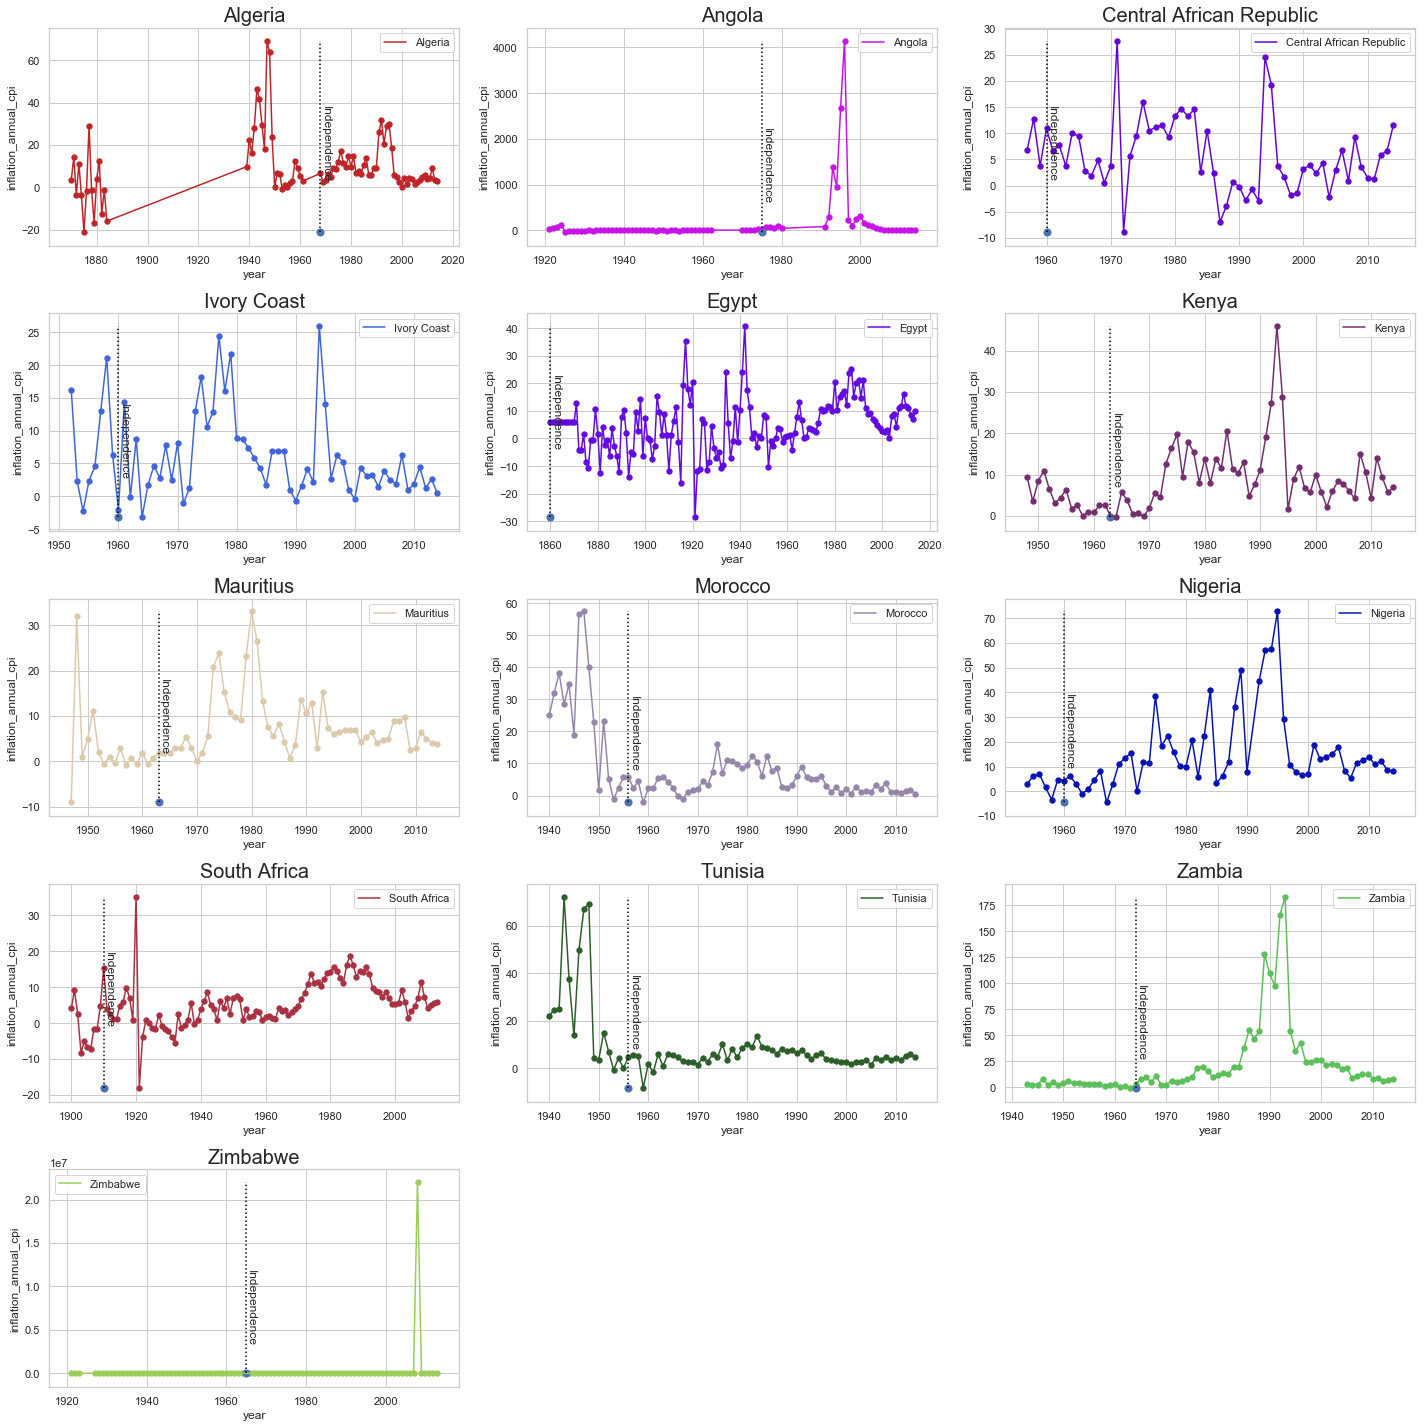

In [73]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in countries:
    plt.subplot(5,3,count)
    count+=1
    color='#'+''.join(random.choice('0123456789ABCDEF') for i in range(6))
    country_data=data[data.country==country]
    sns.lineplot(country_data['year'],
                 country_data['inflation_annual_cpi'],
                color=color,label=country)
    plt.scatter(country_data['year'],country_data['inflation_annual_cpi'],color=color,s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
            [np.min(data[data.country==country]['inflation_annual_cpi']),np.max(country_data['inflation_annual_cpi'])],color='black',linestyle='dotted')
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                   np.max(country_data['inflation_annual_cpi'])/2,'Independence',rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=np.min(data[data.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country, size=20)
plt.tight_layout()
plt.show()

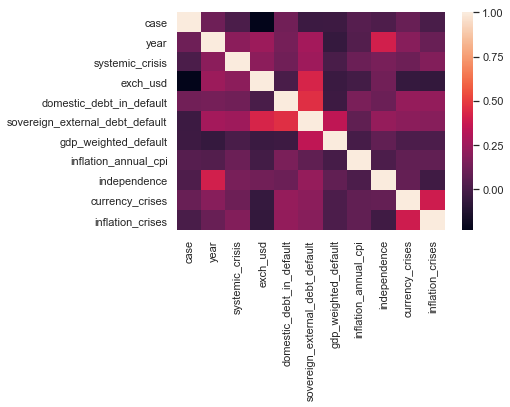

In [74]:
sns.heatmap(data.corr())

In [101]:
#np.argmax(data.corr()['case'][1:])
data.corr()['case'][1:].argmax()
for idx in data.corr():
    temp=data.corr()[idx]
    del(temp[idx])
    print(idx, '%.5f'%(np.max(temp))+": "+np.argmax(temp))

case 0.12836: domestic_debt_in_default
year 0.40736: independence
systemic_crisis 0.24985: sovereign_external_debt_default
exch_usd 0.42289: sovereign_external_debt_default
domestic_debt_in_default 0.46475: sovereign_external_debt_default
sovereign_external_debt_default 0.46475: domestic_debt_in_default
gdp_weighted_default 0.34592: sovereign_external_debt_default
inflation_annual_cpi 0.15183: domestic_debt_in_default
independence 0.40736: year
currency_crises 0.39338: inflation_crises
inflation_crises 0.39338: currency_crises


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [87]:
temp=data.corr()['year']
del(temp['year'])

In [88]:
temp

case                               0.115574
systemic_crisis                    0.197450
exch_usd                           0.248757
domestic_debt_in_default           0.136828
sovereign_external_debt_default    0.271890
gdp_weighted_default              -0.054670
inflation_annual_cpi               0.037035
independence                       0.407360
currency_crises                    0.189390
inflation_crises                   0.098630
Name: year, dtype: float64